In [11]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation
%matplotlib inline  

In [43]:
from dotenv import load_dotenv

# Load .env enviroment variables
load_dotenv()

True

In [44]:
# Part 1 - Personal Finance Planner

# Collect Crypto Prices Using the requests Library
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"  

# Fetch current BTC price
btc_data_response = requests.get(btc_url)
btc_data_response
btc_data_content = btc_data_response.content
btc_data_content

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18653950,\n\t\t\t"total_supply": 18653950,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 59965.0000000000000000,\n\t\t\t\t\t"volume_24h": 50480504555,\n\t\t\t\t\t"market_cap": 1116930737802,\n\t\t\t\t\t"percentage_change_1h": -0.3750819721067780,\n\t\t\t\t\t"percentage_change_24h": -2.8116022946763100,\n\t\t\t\t\t"percentage_change_7d": 22.3298412410885000,\n\t\t\t\t\t"percent_change_1h": -0.3750819721067780,\n\t\t\t\t\t"percent_change_24h": -2.8116022946763100,\n\t\t\t\t\t"percent_change_7d": 22.3298412410885000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 74818.3305,\n\t\t\t\t\t"volume_24h": 62984525533.2735,\n\t\t\t\t\t"market_cap": 1393594481555.56,\n\t\t\t\t\t"percent_change_1h": -0.3750819721067780,\n\t\t\t\t\t"percent_change_24h": -2.8116022946763100,\n\t\t\t\

In [14]:
# Fetch current ETH price
eth_data_response = requests.get(eth_url)
eth_data_response
eth_data_content = eth_data_response.content
eth_data_content

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 115050325,\n\t\t\t"total_supply": 115050325,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1869.4900000000000000,\n\t\t\t\t\t"volume_24h": 27351212781,\n\t\t\t\t\t"market_cap": 214859345727,\n\t\t\t\t\t"percentage_change_1h": -0.1658069464964040,\n\t\t\t\t\t"percentage_change_24h": -3.1822492716205700,\n\t\t\t\t\t"percentage_change_7d": 12.4892899349912000,\n\t\t\t\t\t"percent_change_1h": -0.1658069464964040,\n\t\t\t\t\t"percent_change_24h": -3.1822492716205700,\n\t\t\t\t\t"percent_change_7d": 12.4892899349912000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 2332.562673,\n\t\t\t\t\t"volume_24h": 34126108186.8537,\n\t\t\t\t\t"market_cap": 268080005663.578,\n\t\t\t\t\t"percent_change_1h": -0.1658069464964040,\n\t\t\t\t\t"percent_change_24h": -3.1822492716205700,\n\t\t\

In [15]:
# Organize using JSON

import json
btc_data = btc_data_response.json()
print(json.dumps(btc_data,indent=4))

eth_data = eth_data_response.json()
print(json.dumps(eth_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18653937,
            "total_supply": 18653937,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 59993.0,
                    "volume_24h": 51617453854,
                    "market_cap": 1117345591177,
                    "percentage_change_1h": -0.378595855476683,
                    "percentage_change_24h": -1.24782339130652,
                    "percentage_change_7d": 22.3859253186891,
                    "percent_change_1h": -0.378595855476683,
                    "percent_change_24h": -1.24782339130652,
                    "percent_change_7d": 22.3859253186891
                },
                "CAD": {
                    "price": 74853.2661,
                    "volume_24h": 64403097173.6358,
                  

In [16]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_price = my_btc * btc_price

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_price = my_eth * eth_price

# Compute current value of my crpto

print(f"The current value of your {my_btc} BTC is ${my_btc_price:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_price:0.2f}")

The current value of your 1.2 BTC is $71991.60
The current value of your 5.3 ETH is $9908.30


In [17]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

# Current amount of shares
my_agg = 200
my_spy = 50

# Set Alpaca API key and secret
APCA_API_KEY_ID = os.getenv("ALPACA_API_KEY")
APCA_API_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
APCA_API_BASE_URL="https://paper-api.alpaca.markets"
APCA_API_DATA_URL="https://data.alpaca.markets"

In [18]:
print(f"Alpaca Key Type: {(APCA_API_KEY_ID)}")
print(f"Alpaca Secret Key Type: {(APCA_API_SECRET_KEY)}")

Alpaca Key Type: PKQ722X6TA9SKC26EDZU
Alpaca Secret Key Type: kyY9r2Ns4Zk9TGnbsVhWx3vXCoIBZ5Nn4KcRuKvz


In [19]:
# Create the Alpaca API object
api = tradeapi.REST(
    APCA_API_KEY_ID,
    APCA_API_SECRET_KEY,
    APCA_API_BASE_URL,
    api_version = "v2")


In [20]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()
print(today)

2021-03-12T00:00:00-05:00


In [21]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [22]:
# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers, 
    timeframe, 
    start = today,
    end = today,
    limit=1000
).df 

ticker_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-12 00:00:00-05:00  113.88  113.91  113.705  113.79  4339393  392.07   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-12 00:00:00-05:00  394.21  391.2  394.09  56997361

In [23]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")  

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [24]:
# Compute the current value of shares
my_agg_price = agg_close_price * my_agg
my_spy_price = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_price:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_price:0.2f}") 

The current value of your 50 SPY shares is $19704.50
The current value of your 200 AGG shares is $22758.00


In [25]:
# Set monthly household income
monthly_income = 12000
total_crypto_price = my_btc_price + my_eth_price
total_share_price = my_agg_price + my_spy_price
total = {'amount':[total_crypto_price, total_share_price]}

# Create savings DataFrame
df_savings = pd.DataFrame(total, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,81899.897
shares,42462.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

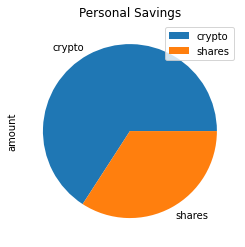

In [26]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [27]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_price + total_share_price

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund!")
    
elif emergency_fund == total_savings:
    print("Congratulations! You have surpassed your target!")
    
else:
    print("You are {emergency_fund - total_savings} away from reaching your target.")

Congratulations! You have enough money in your emergency fund!


In [28]:
# Part 2 - Retirement Planning

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-12', tz='America/New_York').isoformat()  

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1D"
stock_data = api.get_barset(
        tickers,
        timeframe,
        start = start_date,
        end = end_date
    ).df

# Display sample data
stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071  348.62   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3938694  342.96   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3482671  345.93   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  51690440  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853  
2020-10-21 00:00:00-04:00  345.67  342.40  342.69  46745662  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45094573  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
        portfolio_data = stock_data,
        weights = [.4,.6],
        num_simulation = 500,
        num_trading_days = 252*30)
MC_thirty_year.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3938694   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3482671   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-10-19 00:00:00-04:00          NaN  348.62  349.33  341.04  342.02   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.64  343.34   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.40  342.69   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.63   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.76   

                                                  
                             volume daily_return  
time                                              
2020-10-19 00:00:00-04:00  51690440          NaN  
2020-10-20 00:00:00-04:00  48206853     0.003859  
2020-10-21 00:00:00-04:00  46745662    -0.001893  
2020-10-22 00:00:00-04:00  45094573     0.005661  
2020-10-23 00:00:00-04:00  38718140     0.003279

In [31]:
# Run Monte Carlo for 30 year cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999154,1.003084,1.002659,1.001962,1.002978,1.001727,1.006582,1.010279,1.006141,0.992604,...,1.003215,1.005948,1.002994,0.990848,1.001496,0.998563,1.002467,1.002069,0.999832,0.999845
2,0.992634,1.003388,1.008595,1.019080,1.007162,1.006829,1.008266,1.002260,1.002261,1.003018,...,1.001059,1.022208,1.003938,0.993079,0.986931,0.987994,0.997316,1.001341,0.990158,1.010655
3,0.996716,1.013865,1.006528,1.017449,1.002483,1.001097,1.004004,0.999504,1.008971,1.011386,...,1.006169,1.021716,1.005920,0.999497,0.993730,0.990264,0.999099,1.001562,0.990768,1.021058
4,0.994678,1.014234,1.014281,1.012585,1.009325,1.000417,1.004412,1.000900,1.010494,1.008018,...,1.005530,1.023435,1.007739,0.991502,0.993221,0.996652,0.991868,0.993234,0.987891,1.022926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,470.428485,267.240698,427.466739,680.009805,507.270398,385.368304,217.408137,93.993675,310.660218,713.282988,...,71.344721,340.501876,355.145855,132.880455,329.828684,140.649348,448.195305,226.590217,111.829268,529.322639
7557,470.066018,268.770442,429.866752,683.188076,511.324971,384.957856,215.751227,94.572464,311.205789,715.238804,...,70.998674,341.010862,352.141700,132.805287,331.500189,140.350990,448.471620,228.797861,111.914687,523.665505
7558,470.489942,268.163818,430.808331,686.857341,508.217587,391.818581,217.785477,94.323385,312.711230,713.526963,...,71.808192,341.367949,357.152888,133.771146,335.065503,140.821304,452.462392,228.219543,111.874469,521.333551
7559,470.349321,268.127314,434.121001,681.944443,511.253924,398.101055,216.416899,94.037828,311.720636,705.429687,...,71.526229,341.560485,357.699301,135.111404,338.136765,140.266157,450.002918,230.938823,112.189326,522.223995


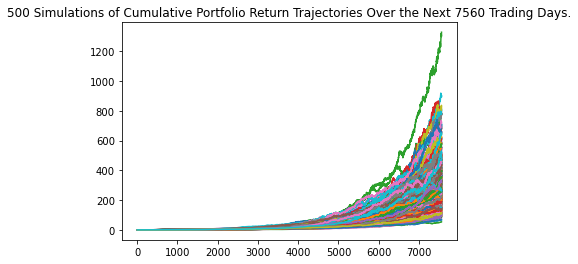

In [32]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

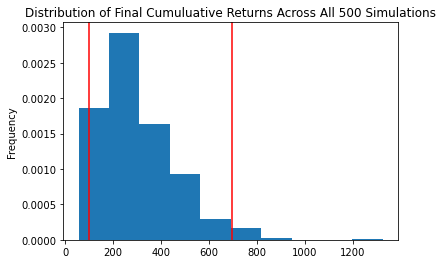

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             301.706707
std              158.977083
min               54.868494
25%              189.758540
50%              266.895273
75%              384.377744
max             1326.802188
95% CI Lower      97.058927
95% CI Upper     696.796741
Name: 7560, dtype: float64


In [39]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

# Set inital investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print Results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1941178.54 and $13935934.81


In [42]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

# Set inital investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*(200000*1.5),2)
ci_upper = round(tbl[9]*(20000*1.5),2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $29117678.14 and $20903902.22
